In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['no_nike', 'nike']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (128, 128)

In [3]:
def load_data():
    """
        Load the data:
            
    """
    
    datasets = [r'D:\Carpeta_alumno\Desafio\Modelo\train_set',
                r'D:\Carpeta_alumno\Desafio\Modelo\test_set']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder.
            for file in os.listdir(os.path.join(dataset, folder)):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading D:\Carpeta_alumno\Desafio\Modelo\train_set
Loading D:\Carpeta_alumno\Desafio\Modelo\test_set


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=42)

In [6]:
train_labels[:10]

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1])

## Let's explore the dataset

In [7]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of testing examples: {}".format(n_test))
print("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1676
Number of testing examples: 190
Each image is of size: (128, 128)


In [8]:
train_images[0][0][0][0]

193.0

In [9]:
print("N dimensiones ",train_images.ndim)
print("Shape ",train_images.shape)
print("Size ",train_images.size)

N dimensiones  4
Shape  (1676, 128, 128, 3)
Size  82378752


In [10]:
14034*32*32*3

43112448

In [11]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

In [12]:
class_names

['no_nike', 'nike']

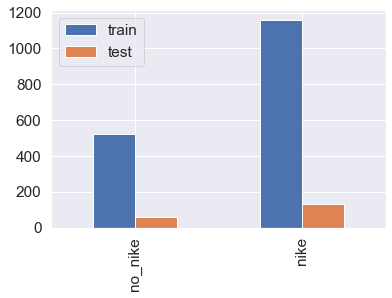

In [13]:
pd.DataFrame({'train': train_counts,
              'test': test_counts},
              index=class_names
              ).plot.bar()
plt.show()

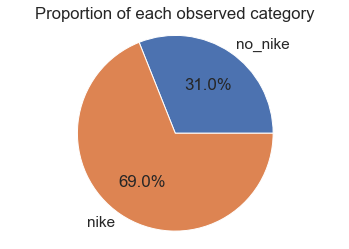

In [14]:
plt.pie(train_counts, explode = (0,0), labels = class_names, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [15]:
print(train_images.max())
print(test_images.min())

255.0
0.0


In [16]:
train_images = train_images/255.0
test_images = test_images/255.0

In [17]:
train_images.shape[0]

1676

1


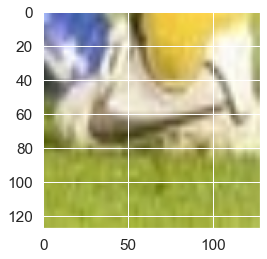

In [18]:
index = np.random.randint(train_images.shape[0])
print(train_labels[index])
plt.imshow(train_images[index])


In [19]:
def display_random_image(class_names, images, labels):
    index = np.random.randint(images.shape[0])
    plt.imshow(images[index])
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])

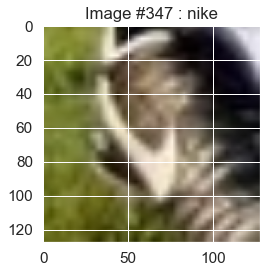

In [20]:
display_random_image(class_names, train_images, train_labels)

In [21]:
def display_examples(class_names, images, labels):
    fig = plt.figure(figsize=(25,25))
    fig.suptitle("Some examples of images in my dataset", fontsize = 22)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])

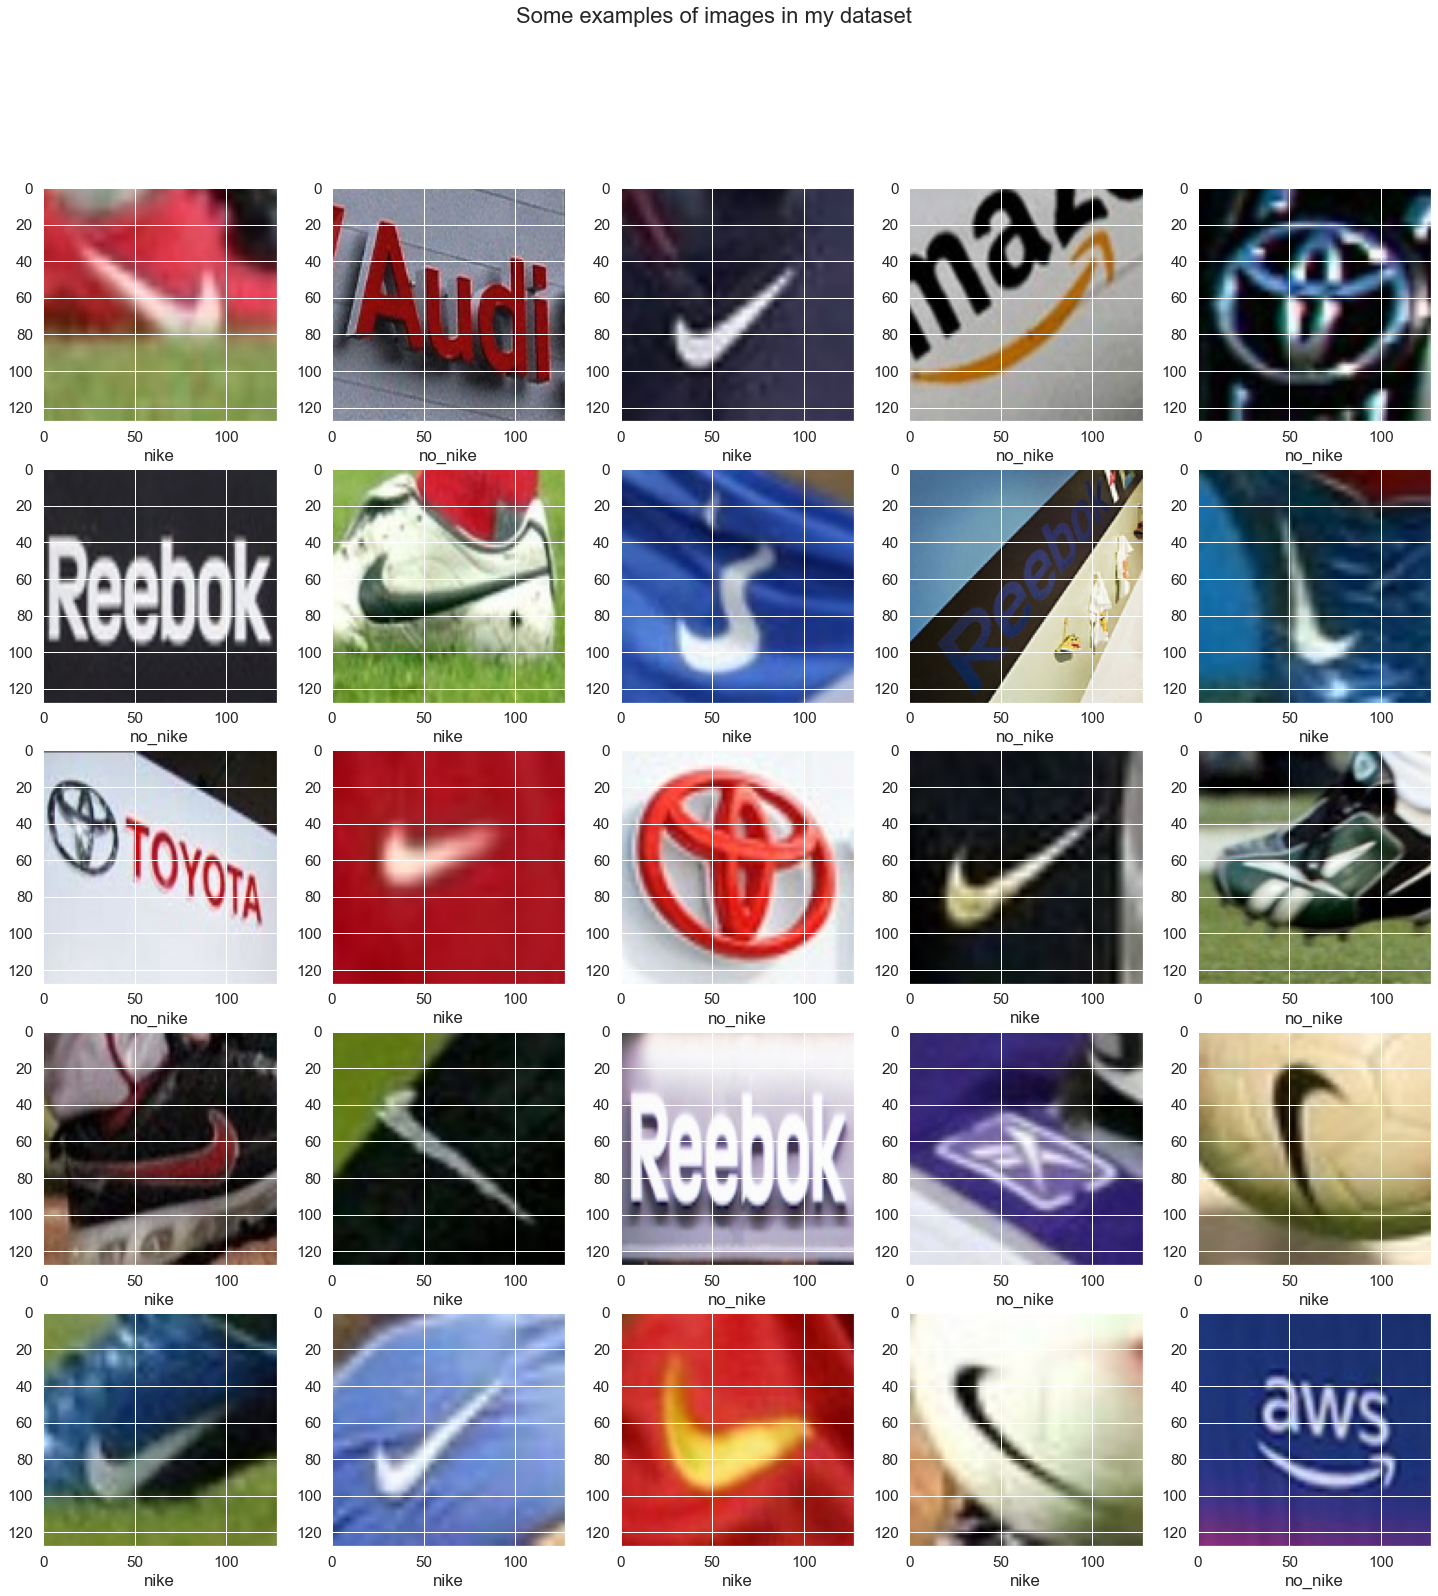

In [22]:
display_examples(class_names, train_images, train_labels)

## Creación de nuestro modelo

In [23]:
IMAGE_SIZE

(128, 128)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [26]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
11/11 [==============================] - 11s 981ms/step - loss: 1.3552 - accuracy: 0.6052 - val_loss: 0.6356 - val_accuracy: 0.6488
Epoch 2/10
11/11 [==============================] - 12s 1s/step - loss: 0.5805 - accuracy: 0.7381 - val_loss: 0.5273 - val_accuracy: 0.7440
Epoch 3/10
11/11 [==============================] - 12s 1s/step - loss: 0.4141 - accuracy: 0.8448 - val_loss: 0.3144 - val_accuracy: 0.8512
Epoch 4/10
11/11 [==============================] - 12s 1s/step - loss: 0.2923 - accuracy: 0.8843 - val_loss: 0.2637 - val_accuracy: 0.9137
Epoch 5/10
11/11 [==============================] - 11s 1s/step - loss: 0.2590 - accuracy: 0.9015 - val_loss: 0.2390 - val_accuracy: 0.9077
Epoch 6/10
11/11 [==============================] - 12s 1s/step - loss: 0.1997 - accuracy: 0.9321 - val_loss: 0.2398 - val_accuracy: 0.8988
Epoch 7/10
11/11 [==============================] - 10s 943ms/step - loss: 0.1692 - accuracy: 0.9440 - val_loss: 0.1896 - val_accuracy: 0.9167
Epoch 8/10
11/

In [28]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.355195,0.605224,0.635611,0.648810
1,0.580467,0.738060,0.527259,0.744048
2,0.414072,0.844776,0.314429,0.851190
3,0.292346,0.884328,0.263747,0.913690
4,0.259017,0.901493,0.238984,0.907738
5,0.199700,0.932090,0.239786,0.898810
6,0.169219,0.944030,0.189601,0.916667
7,0.165992,0.941045,0.169939,0.937500
8,0.118975,0.963433,0.159324,0.940476
9,0.090717,0.973881,0.193301,0.916667


In [29]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the neural network.
    """

    fig = plt.figure(figsize=(15,10))

    #Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label = 'acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label = 'val_acc')
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    #Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label = 'loss')
    plt.plot(history.history['val_loss'], 'ro--', label = 'val_loss')
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.show()


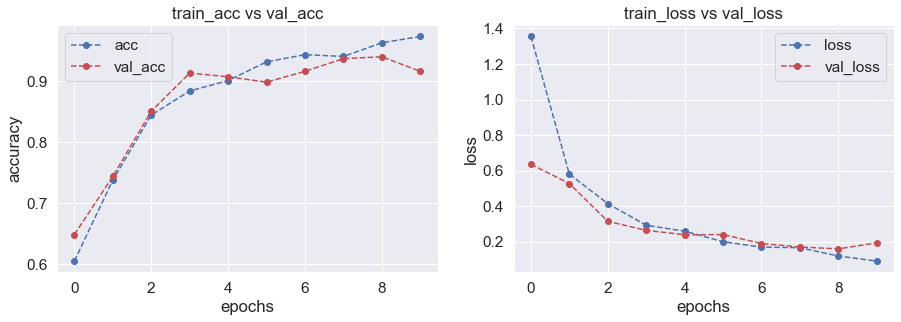

In [30]:
plot_accuracy_loss(history)

In [31]:
test_loss = model.evaluate(test_images, test_labels)

6/6 [==============================] - 0s 58ms/step - loss: 0.2815 - accuracy: 0.9053


In [32]:
print('Acc test', round(test_loss[1]*100, 3), ' %')

Acc test 90.526  %


In [33]:
predictions = model.predict(test_images)
#pred_labels = np.argmax(predictions, axis=1)

In [34]:
pred_labels = []
for i in predictions:
    if i >= 0.6:
        pred_labels.append(1)
    else:
        pred_labels.append(0)    

In [35]:
predictions[1]

array([0.9954028], dtype=float32)

In [36]:
np.argmax(predictions, axis=1)[1]

0

In [37]:
class_names[0]

'no_nike'

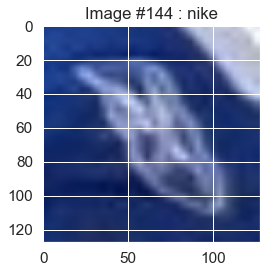

In [38]:
display_random_image(class_names, test_images, pred_labels)

In [39]:
def print_misslabeled_images(class_names, test_images, test_labels, pred_labels):
    BOO = (test_labels==pred_labels)
    mislabeled_indices = np.where(BOO==0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    title = "Some examples of mislabeled images by the classfier:"
    display_examples(class_names, mislabeled_images, mislabeled_labels)

In [40]:
#print_misslabeled_images(class_names, test_images, test_labels, pred_labels)

In [41]:
confusion_matrix(test_labels, pred_labels)

array([[ 43,  15],
       [  4, 128]], dtype=int64)

In [42]:
class_names

['no_nike', 'nike']

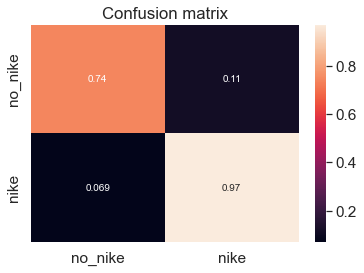

In [43]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()

sns.heatmap(CM/np.sum(CM,axis=1), annot=True, annot_kws={'size':10}, xticklabels=class_names, yticklabels=class_names, ax=ax )
ax.set_title('Confusion matrix')
plt.show()

In [44]:
#model.save("clasificador_nike.h5")

In [45]:
pd.DataFrame(history.history).to_csv('clasificador_nike_history')

In [46]:
predictions

array([[9.98017013e-01],
       [9.95402813e-01],
       [9.94898975e-01],
       [9.81943250e-01],
       [9.87035871e-01],
       [9.95035470e-01],
       [9.54542994e-01],
       [3.09556216e-01],
       [9.96150494e-01],
       [9.98530865e-01],
       [9.75717843e-01],
       [9.99547005e-01],
       [9.96814132e-01],
       [9.69858408e-01],
       [9.98460650e-01],
       [9.87148285e-01],
       [9.99261320e-01],
       [9.78622973e-01],
       [9.96078968e-01],
       [9.64329720e-01],
       [9.57611918e-01],
       [9.94219661e-01],
       [9.91378605e-01],
       [8.61510515e-01],
       [9.72700596e-01],
       [9.97368097e-01],
       [9.85592246e-01],
       [9.97867882e-01],
       [9.99869466e-01],
       [9.92413282e-01],
       [9.31656480e-01],
       [9.98472989e-01],
       [9.96548533e-01],
       [9.99829531e-01],
       [9.98935699e-01],
       [9.97393668e-01],
       [9.94470954e-01],
       [9.95316982e-01],
       [9.82996225e-01],
       [9.99508440e-01],
